In [1]:
import pandas as pd
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import copy
import math
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns',None)

# Import dataset

##### Table engagement

In [3]:
e = open("engagement","rb")
engagement = pickle.load(e)

In [4]:
df_eng = pd.DataFrame(engagement)

In [5]:
df_unique = df_eng.groupby("subid").mean()

##### Table subscribers

In [6]:
s = open("subscribers","rb")
subscribers = pickle.load(s)

In [7]:
df_subs = pd.DataFrame(subscribers)

In [8]:
df_subs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


##### Table customer service representatives

In [9]:
c = open("customer_service_reps","rb")
channel_spend = pickle.load(c)
df_chan = pd.DataFrame(channel_spend)
df_chan.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


##### Merge dataset

In [10]:
df_merge = pd.read_csv("subscribers.csv")

In [11]:
df_merge_all = pd.merge(df_merge,df_unique,on = "subid")

# Customer Segmentation

In [12]:
df_segment_f = pd.DataFrame()

In [13]:
df_merge_all.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period_x', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed', 'app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'payment_period_y'],
      dtype='object')

In [14]:
df_segment_f["subid"] = df_merge_all["subid"]
df_segment_f["age"] = df_merge_all["age"]
#df_segment_f["gender"] = df_merge_all["male_TF"]
#df_segment_f["preferred_genre"] = df_merge_all["preferred_genre"]
#df_segment_f["intended_use"] = df_merge_all["intended_use"]
df_segment_f["weekly_consumption_hour"] = df_merge_all["weekly_consumption_hour"]
df_segment_f["app_opens"] = df_merge_all["app_opens"]
df_segment_f["num_videos_completed"] = df_merge_all["num_videos_completed"]
df_segment_f["num_series_started"] = df_merge_all["num_series_started"]
df_segment_f["payment_period"] = df_merge_all["payment_period_x"]
#df_segment_f["num_videos_more_than_30_seconds"] = df_merge_all["num_videos_more_than_30_seconds"]
#df_segment_f['num_videos_rated'] = df_merge_all['num_videos_rated']
#df_segment_f["current_sub"] = df_merge_all["current_sub_TF"]

In [15]:
df_segment_f

,subid,age,weekly_consumption_hour,app_opens,num_videos_completed,num_series_started,payment_period
0,26844789,25.0,36.001186,1.000000,6.500000,0.500000,0
1,29726122,61.0,20.051667,0.975610,4.439024,0.951220,1
2,20299962,23.0,34.551230,2.260870,1.826087,0.630435,1
3,24930568,73.0,25.851492,1.500000,1.000000,0.000000,1
4,21361112,24.0,37.451142,2.000000,1.000000,0.000000,1
...,...,...,...,...,...,...,...
135014,21928274,NaN,NaN,1.785714,3.285714,0.785714,0
135015,25549852,61.0,28.751405,1.000000,0.000000,0.000000,1
135016,25835684,43.0,24.401536,2.583333,3.916667,0.666667,1
135017,21434712,38.0,28.751405,1.777778,2.222222,0.222222,1


In [ ]:
#df_segment_f.loc[(df_segment_f["gender"] == True),"gender"] = 1 
#df_segment_f.loc[(df_segment_f["gender"] == False),"gender"] = 0

In [16]:
df_segment_f.loc[df_segment_f['age'] > 80, "age"] = np.nan
df_segment_f.loc[df_segment_f["age"] < 12,"age"] = 12
avg_age = round(df_segment_f["age"].mean())
df_segment_f.loc[(df_segment_f["age"].isna() == True),"age"] = avg_age

In [17]:
df_segment_f.loc[(df_segment_f["weekly_consumption_hour"] < 0),"weekly_consumption_hour"] = np.nan
avg_consum_h = round(df_segment_f["weekly_consumption_hour"].mean())
df_segment_f.loc[(df_segment_f["weekly_consumption_hour"].isna() == True),"weekly_consumption_hour"] = avg_consum_h

In [ ]:
#get dummies
#df_segment_f = pd.concat([df_segment_f.drop('preferred_genre', axis=1), pd.get_dummies(df_segment_f['preferred_genre']).rename(columns=lambda x: "preferred_genre" + str(x))], axis=1)
#df_segment_f = pd.concat([df_segment_f.drop('intended_use', axis=1), pd.get_dummies(df_segment_f['intended_use']).rename(columns=lambda x: "intended_use" + str(x))], axis=1)

In [ ]:
#df_segment_f.loc[(df_segment_f["current_sub"] == True),"current_sub"] = 1 
#df_segment_f.loc[(df_segment_f["current_sub"] == False),"current_sub"] = 0

In [ ]:
#df_segment_f.drop(["preferred_genreinternational","preferred_genreother","preferred_genreregional","preferred_genreother"],axis = 1, inplace = True)

In [18]:
df_seg = df_segment_f.drop(["subid"], axis = 1)
df_seg.dropna(inplace=True)

In [19]:
#Normalize dataset
x = df_seg.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scale = pd.DataFrame(x_scaled)

In [ ]:
#Standardize dataset
#x = df_seg.values
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)
#df_scale = pd.DataFrame(x_scaled)

In [ ]:
#df_scale.rename(columns={0:'weekly_consumption_hour',1:'age',2:'gender',3:"app_opens",4:'num_videos_completed',5:'num_series_started',6:'payment_period',
#                        7:'comedy',8:'drama',9:'international',10:'other',11: 'regional',12:'access to exclusive content',13:'education',14:'expand international access',
#                        15:'expand regional access',16:'other',17:'replace OTT',18:'supplement OTT'},inplace = True)

In [ ]:
df_scale

In [20]:
# use elbow method to find the optimal k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scale)
    distortions.append(kmeanModel.inertia_)

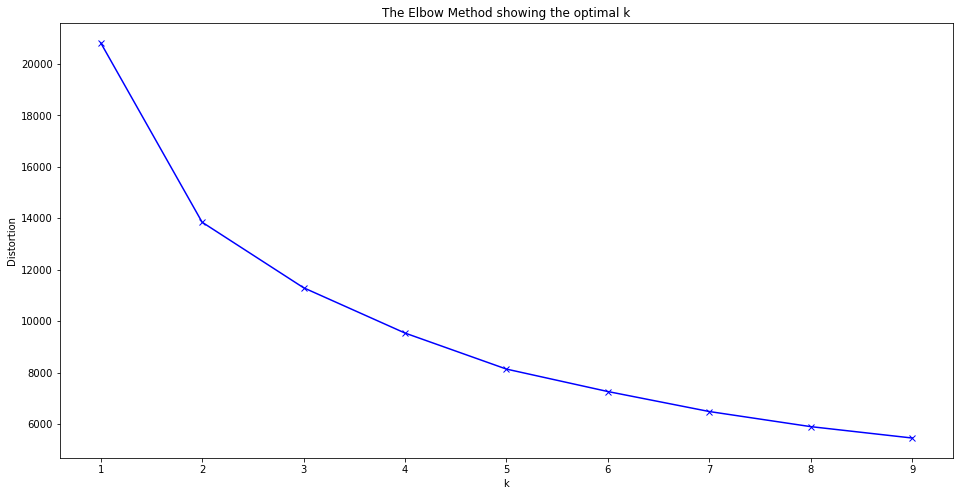

In [21]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df_scale)

KMeans(n_clusters=4)

In [23]:
y_km = kmeanModel.fit_predict(df_scale)

In [24]:
clus = pd.DataFrame(y_km)

In [25]:
df_segment_f['cluster'] = clus[0]

In [26]:
df_cluster = df_segment_f.dropna()

In [27]:
#df_cluster.groupby("cluster").count()["gender"]

In [28]:
df_cluster.groupby("cluster").mean()

,subid,age,weekly_consumption_hour,app_opens,num_videos_completed,num_series_started,payment_period
cluster,,,,,,,
0,2.497000e+07,49.530301,27.507166,1.283515,1.595149,0.180829,0.000000
1,2.499205e+07,46.531281,27.793864,2.440241,3.589397,0.836130,0.449279
2,2.500502e+07,42.927686,28.461300,1.847824,2.568040,0.486516,2.077024
3,2.499031e+07,43.023039,28.296298,1.393056,1.779612,0.212305,1.000000


In [33]:
df_cluster.groupby("cluster").count()

,subid,age,weekly_consumption_hour,app_opens,num_videos_completed,num_series_started,payment_period
cluster,,,,,,,
0,32583,32583,32583,32583,32583,32583,32583
1,45188,45188,45188,45188,45188,45188,45188
2,25979,25979,25979,25979,25979,25979,25979
3,31269,31269,31269,31269,31269,31269,31269


In [ ]:
df_cluster.to_csv("segmentation_final.csv",index = False)

# Allocation & Attribution

In [29]:
channel = pd.read_csv("channel_spend_graduate.csv")

In [30]:
spend = channel.groupby('channel')["spend_AED"].sum()

In [31]:
df_allo = spend.rename_axis("Channel").reset_index(name = "Spend")
df_allo

,Channel,Spend
0,bing,10800
1,display,366
2,facebook,113500
3,search,222500
4,youtube,8730


In [32]:
df_attribution = df_merge.loc[df_merge["attribution_technical"].str.contains("facebook|bing|display|search|youtube")]

In [34]:
df_attribution["attribution_technical"].value_counts()

facebook                 80251
search                   25306
facebook_organic          3272
brand sem intent bing     2231
display                   1407
bing                      1146
youtube                    913
bing_organic               369
Name: attribution_technical, dtype: int64

In [35]:
df_attribution.drop(df_attribution.loc[df_attribution["attribution_technical"].str.contains("facebook_organic|brand sem intent bing|bing_organic")].index,inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df_attribution["attribution_technical"].value_counts()

facebook    80251
search      25306
display      1407
bing         1146
youtube       913
Name: attribution_technical, dtype: int64

In [37]:
# count the total number of new customers under each channel
facebook_num = df_attribution.loc[df_attribution["attribution_technical"] == "facebook"].shape[0]
search_num = df_attribution.loc[df_attribution["attribution_technical"] == "search"].shape[0]
bing_num = df_attribution.loc[df_attribution["attribution_technical"] == "bing"].shape[0]
youtube_num = df_attribution.loc[df_attribution["attribution_technical"] == "youtube"].shape[0]
display_num = df_attribution.loc[df_attribution["attribution_technical"] == "display"].shape[0]
num_list = [bing_num,display_num,facebook_num,search_num,youtube_num]

In [38]:
df_allo["New_cus_num"] = num_list

In [39]:
df_allo["CAC"] = df_allo["Spend"]/df_allo["New_cus_num"]

In [40]:
df_allo

,Channel,Spend,New_cus_num,CAC
0,bing,10800,1146,9.424084
1,display,366,1407,0.260128
2,facebook,113500,80251,1.414313
3,search,222500,25306,8.792381
4,youtube,8730,913,9.561884


##### Calclulate Total Revenue. Total Revenue = payment period*discount price + join fee

In [41]:
df_attribution["join_fee"].fillna(0,inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [42]:
df_attribution.loc[df_attribution["join_fee"] < 0,"join_fee"] = 0

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [53]:
df_attribution.loc[df_attribution['payment_period']!=0, 'Total_Revenue'] = df_attribution['join_fee'] + df_attribution['monthly_price'] * df_attribution['payment_period']
df_attribution.loc[df_attribution['payment_period']==0, 'Total_Revenue'] = df_attribution['join_fee']

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [54]:
Total_revenue = df_attribution.groupby("attribution_technical").sum()["Total_Revenue"]

In [55]:
rev_list = Total_revenue.values

In [56]:

#df_facebook = df_attribution.loc[df_attribution["attribution_technical"] == "facebook"]
#df_search = df_attribution.loc[df_attribution["attribution_technical"] == "search"]
#df_youtube = df_attribution.loc[df_attribution["attribution_technical"] == "youtube"]
#df_display = df_attribution.loc[df_attribution["attribution_technical"] == "display"]

In [57]:
#rev_bing = round(sum(df_bing["payment_period"]*df_bing["discount_price"] + df_bing["join_fee"]))
#rev_facebook = round(sum(df_facebook["payment_period"]*df_facebook["discount_price"] + df_facebook["join_fee"]))
#rev_search = round(sum(df_search["payment_period"]*df_search["discount_price"] + df_search["join_fee"]))
#rev_youtube = round(sum(df_youtube["payment_period"]*df_youtube["discount_price"] + df_youtube["join_fee"]))
#rev_display = round(sum(df_display["payment_period"]*df_display["discount_price"] + df_display["join_fee"]))
#rev_list = [rev_bing,rev_facebook,rev_search,rev_youtube,rev_display]

In [58]:
df_allo["Revenue"] = rev_list

In [59]:
df_allo

,Channel,Spend,New_cus_num,CAC,Revenue,CLV,CLV/CAC
0,bing,10800,1146,9.424084,3791.5504,-6.260262,-0.664283
1,display,366,1407,0.260128,4302.3777,2.665621,10.247347
2,facebook,113500,80251,1.414313,293322.5480,2.075708,1.467645
3,search,222500,25306,8.792381,103964.7142,-4.868512,-0.553719
4,youtube,8730,913,9.561884,3347.7740,-6.056853,-0.633437


In [60]:
df_allo["CLV"] = (df_allo["Revenue"] - df_allo["Spend"])/df_allo["New_cus_num"]

In [61]:
df_allo["CLV/CAC"] = df_allo["CLV"]/df_allo["CAC"]

In [63]:
df_allo.to_csv("allocation_result.csv")

### Churn prediction

In [64]:
pd.options.display.max_columns = 25

In [65]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [66]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [67]:
df_merge_all.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period_x', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed', 'app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'payment_period_y'],
      dtype='object')

In [68]:
df_merge_all

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,payment_period_x,last_payment,next_payment,cancel_date,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y
0,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,0,NaN,NaN,NaN,True,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,0.000000
1,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,...,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098
2,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,...,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,True,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,0.673913
3,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,...,1,2020-03-08 17:50:25,2020-07-08 17:50:25,NaN,True,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000,0.000000
4,290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,24.0,True,UAE,search,...,1,2019-12-15 07:29:14,2020-04-15 07:29:14,NaN,True,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,230734,21928274,base,NaN,drama,replace OTT,NaN,NaN,NaN,False,UAE,facebook,...,0,NaN,NaN,NaN,True,1.785714,0.571429,3.285714,6.285714,0.107143,0.785714,0.464286
135015,577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,61.0,False,UAE,affiliate,...,1,2020-03-20 02:57:03,2020-07-20 02:57:03,NaN,True,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000
135016,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,email,...,1,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN,True,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000
135017,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,...,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000


In [69]:
df_churn = df_merge_all.drop(['Unnamed: 0',"subid","package_type",'preferred_genre',"intended_use","attribution_technical",'attribution_survey','op_sys','country','plan_type','account_creation_date','trial_end_date','language','payment_type','last_payment','next_payment','cancel_date'],axis = 1)

In [70]:
df_churn.loc[(df_churn["male_TF"] == True),"male_TF"] = 1 
df_churn.loc[(df_churn["male_TF"] == False),"male_TF"] = 0
df_churn.loc[(df_churn["initial_credit_card_declined"] == True),"initial_credit_card_declined"] = 1 
df_churn.loc[(df_churn["initial_credit_card_declined"] == False),"initial_credit_card_declined"] = 0
df_churn.loc[(df_churn["current_sub_TF"] == True),"current_sub_TF"] = 1 
df_churn.loc[(df_churn["current_sub_TF"] == False),"current_sub_TF"] = 0
df_churn.loc[(df_churn["trial_completed"] == True),"trial_completed"] = 1 
df_churn.loc[(df_churn["trial_completed"] == False),"trial_completed"] = 0

In [71]:
df_churn.loc[(df_churn['age']>90)|(df_churn['age']< 5),'age'] = np.nan
avg_age_churn = round(df_churn["age"].mean())
df_churn.loc[(df_churn["age"].isna() == True),"age"] = avg_age_churn

In [72]:
df_churn.loc[df_churn['current_sub_TF'] == False,'churn_TF'] = 1
df_churn.loc[df_churn['current_sub_TF'] == True, 'churn_TF'] = 0

In [73]:
df_churn.dropna(inplace = True)

In [74]:
df_churn

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,months_per_bill_period,monthly_price,discount_price,initial_credit_card_declined,join_fee,num_trial_days,current_sub_TF,payment_period_x,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn_TF
0,3.0,36.001186,2.0,25.0,1,4,4.7343,4.5141,0,0.1101,14,0,0,1,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,0.000000,1.0
1,2.0,20.051667,2.0,61.0,0,4,4.7343,4.5141,0,0.3303,14,1,1,1,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098,0.0
2,3.0,34.551230,2.0,23.0,0,4,4.7343,4.5141,0,0.0000,14,1,1,1,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,0.673913,0.0
5,2.0,28.751405,2.0,57.0,0,4,4.7343,4.5141,0,0.0367,14,0,0,1,2.400000,0.800000,3.600000,4.400000,0.000000,0.600000,0.000000,1.0
6,3.0,33.101274,2.0,54.0,0,4,4.7343,4.5141,0,0.0367,14,0,0,1,5.071429,0.428571,3.714286,4.857143,0.000000,0.857143,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,4.0,27.301448,2.0,44.0,0,4,4.7343,4.5141,0,0.0000,14,1,1,1,1.000000,0.500000,1.500000,5.500000,0.000000,0.500000,0.000000,0.0
135013,3.0,30.201361,2.0,32.0,0,4,4.7343,4.5141,0,0.0000,14,1,2,1,1.500000,2.000000,6.000000,6.500000,0.000000,0.500000,0.000000,0.0
135016,2.0,24.401536,2.0,43.0,0,4,4.7343,4.5141,0,0.0000,14,1,1,1,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000,0.0
135017,3.0,28.751405,2.0,38.0,0,4,4.7343,4.5141,0,0.3303,14,1,1,1,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000,0.0


In [75]:
df_train, df_test = model_selection.train_test_split(df_churn, test_size=0.3)

In [105]:
df_train.shape[0]

55640

In [106]:
df_test.shape[0]

23846

In [107]:
df_churn.shape[0]

79486

In [77]:
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['num_weekly_services_utilized','weekly_consumption_hour', 'discount_price',
        'join_fee', 'payment_period_x', 'trial_completed', 'app_opens','num_videos_completed',
       'cust_service_mssgs',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started']    # list of x covariates,'months_per_bill_period','initial_credit_card_declined''num_trial_days',,
#add_constant_TF = True

In [78]:
# --- preprocess data for model routine format requirements
#if add_constant_TF:
#    x_col_name.append('const')
#    df_train = sm.add_constant(df_train) #has_constant = "add"
#    df_test = sm.add_constant(df_test)

In [79]:
#df_train[x_col_name]

In [80]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float))
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                                 OLS Regression Results                                
Dep. Variable:               churn_TF   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                          1.738e+04
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:12:00   Log-Likelihood:                         -13982.
No. Observations:               55640   AIC:                                  2.799e+04
Df Residuals:                   55628   BIC:                                  2.810e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025

In [81]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float))
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.263788
         Iterations 8

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                55640
Model:                          Logit   Df Residuals:                    55628
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.6176
Time:                        22:13:36   Log-Likelihood:                -14677.
converged:                       True   LL-Null:                       -38386.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num_weekly_services_utilized     

In [82]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name].astype(float))
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name].astype(float))

<ipython-input-82-bacb990eae57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name].astype(float))
<ipython-input-82-bacb990eae57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name].astype(float))


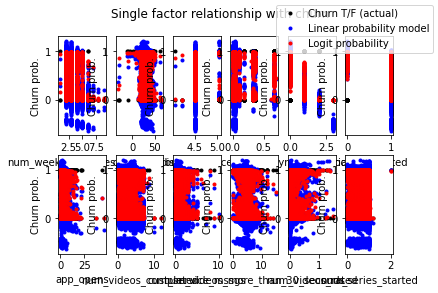

In [83]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

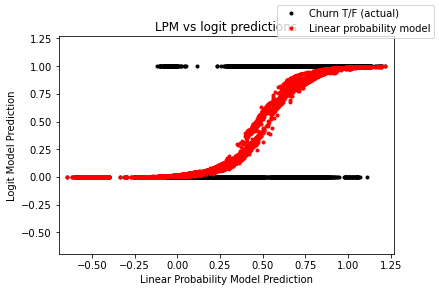

In [84]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [85]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

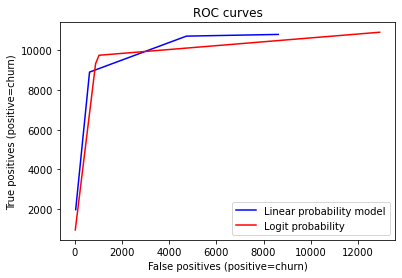

In [86]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [96]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.7343
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [97]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [98]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [99]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind


In [100]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

In [101]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

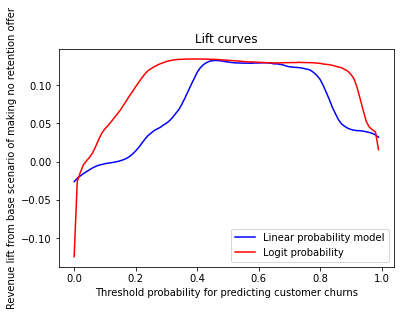

In [102]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

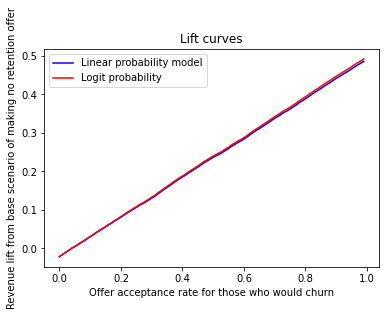

In [103]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


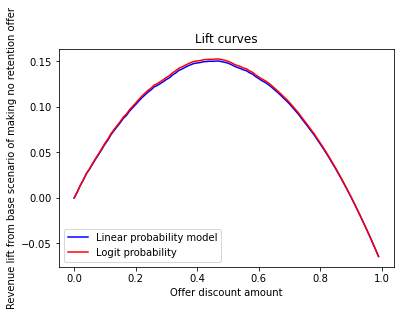

In [104]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [110]:
df_test[x_col_name]

,num_weekly_services_utilized,weekly_consumption_hour,discount_price,join_fee,payment_period_x,trial_completed,app_opens,num_videos_completed,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
52440,3.0,33.101274,4.5141,0.0367,0,1,1.840909,3.045455,0.159091,4.500000,0.0,0.750000
93950,4.0,31.651317,4.5141,0.0367,1,1,5.571429,4.500000,0.928571,4.500000,0.0,0.928571
120410,3.0,27.301448,4.5141,0.0367,2,1,1.166667,1.166667,0.500000,4.333333,0.0,0.166667
66756,3.0,30.201361,4.5141,0.0367,2,1,1.333333,1.000000,0.333333,5.000000,0.0,0.166667
87721,3.0,31.651317,4.5141,0.6606,1,1,3.500000,4.250000,1.500000,5.250000,0.0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
55744,3.0,25.851492,4.5141,0.0000,0,1,2.107143,0.714286,0.214286,6.500000,0.0,0.178571
110959,3.0,21.501623,4.5141,0.0367,0,0,0.857143,5.285714,0.857143,5.285714,0.0,0.714286
127260,3.0,33.101274,4.5141,0.0367,2,1,7.065217,3.782609,0.000000,4.478261,0.0,0.934783
31650,4.0,31.651317,4.5141,0.0367,1,1,5.181818,3.727273,0.363636,5.000000,0.0,0.727273


In [120]:
#set
threshold = 0.5
base_num = 79486
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
aa = df_test[df_test['prob_churn_lpm'] > threshold].shape[0]
model_churn_r = aa/23846
print('churn rate:',model_churn_r)
model_churn_num = round(base_num * model_churn_r)
model_not_churn = base_num - model_churn_num


#看不同discount和不同offer人群对应的revenue
for discount in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    print('discount:',discount)
    accept_rate = discount
    
    #不给offer
    no_discount_revenue = model_not_churn * 10
    print('不给offer的revenue：',no_discount_revenue)

    #给所有人offer
    churn_revenue = model_churn_num * accept_rate * (1-discount)*10
    not_churn_revenue = model_not_churn * 10 * (1-discount)
    all_churn_revenue = churn_revenue + not_churn_revenue
    print('给所有人offer的revenue：',all_churn_revenue)
    lift1 = all_churn_revenue/no_discount_revenue
    print('给所有人offer的提升：',lift1)

    #只给churn offer
    only_churn_revenue = churn_revenue + no_discount_revenue
    lift2 = only_churn_revenue/no_discount_revenue
    print('只给churn的人offer的revenue',only_churn_revenue)
    print('只给churn的人offer的提升：',lift2)
    
    print(' ')

churn rate: 0.43638346053845506
discount: 0.1
不给offer的revenue： 448000
给所有人offer的revenue： 434417.4
给所有人offer的提升： 0.9696816964285715
只给churn的人offer的revenue 479217.4
只给churn的人offer的提升： 1.0696816964285716
 
discount: 0.2
不给offer的revenue： 448000
给所有人offer的revenue： 413897.60000000003
给所有人offer的提升： 0.9238785714285715
只给churn的人offer的revenue 503497.60000000003
只给churn的人offer的提升： 1.1238785714285715
 
discount: 0.3
不给offer的revenue： 448000
给所有人offer的revenue： 386440.6
给所有人offer的提升： 0.8625906249999999
只给churn的人offer的revenue 520840.6
只给churn的人offer的提升： 1.162590625
 
discount: 0.4
不给offer的revenue： 448000
给所有人offer的revenue： 352046.4
给所有人offer的提升： 0.7858178571428572
只给churn的人offer的revenue 531246.4
只给churn的人offer的提升： 1.1858178571428573
 
discount: 0.5
不给offer的revenue： 448000
给所有人offer的revenue： 310715.0
给所有人offer的提升： 0.6935602678571429
只给churn的人offer的revenue 534715.0
只给churn的人offer的提升： 1.1935602678571429
 
discount: 0.6
不给offer的revenue： 448000
给所有人offer的revenue： 262446.4
给所有人offer的提升： 0.5858178571428572
只